# TASK 5 THE SPARKS FOUNDATION

##### You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

### Importing Important Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading File

In [24]:
df=pd.read_csv('SampleSuperstore.csv')

In [25]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [26]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [27]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [28]:
df.shape

(9994, 13)

In [171]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [172]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### CHECKING DATA
##### We will check if there is any issue data inconsistency and the various data types of the entries.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [30]:
df.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

## Data Visualisation

#### QUANTITIES

<BarContainer object of 9994 artists>

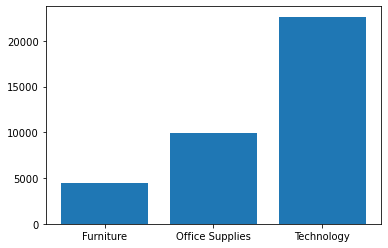

In [174]:
plt.bar('Category','Sales',data=df)

       Segment  Quantity
0     Consumer     19521
1    Corporate     11608
2  Home Office      6744


Text(0.5, 1.0, 'Quantities ordered by each segment')

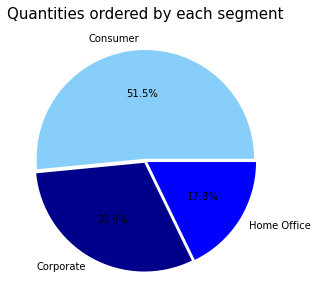

In [162]:
df_group = df.groupby('Segment')['Quantity'].sum().reset_index()
print(df_group)
labels = df['Segment'].unique()
colors = ['lightskyblue', 'darkblue', 'blue']
plt.figure(figsize=(5,5))
plt.pie(df_group['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02), colors=colors)
plt.title('Quantities ordered by each segment',size= 15)

#### POPULAR SHIPPING MODELS

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

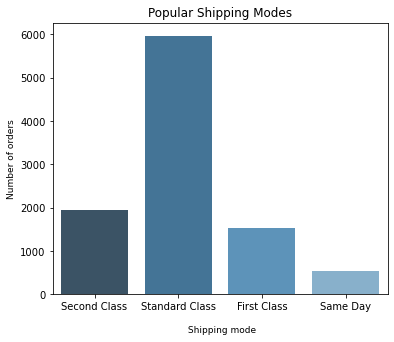

In [164]:
plt.figure(figsize=(6,5))
sns.countplot('Ship Mode',data=df, palette='Blues_d')

plt.title('Popular Shipping Modes',size=12)
plt.xlabel('\n Shipping mode',size=9)
plt.ylabel('Number of orders',size=9)
plt.xticks(fontsize=10)

##### As we can see, the standard class shipping has the most count which means the customers have opted for this type of sipping mode the most. This is because Standard class delivery will cost less compared to the the premium for same day delivery is much higher. Hence, customers choosing same day delivery is the least.

#### SHIPPING MODES

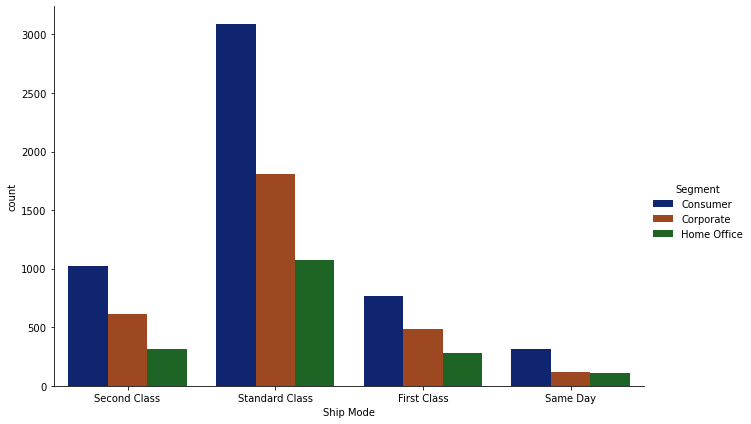

In [167]:
sns.catplot('Ship Mode',data=df,hue='Segment',kind='count',palette='dark',aspect=1.5,height=6)

#### State

In [168]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

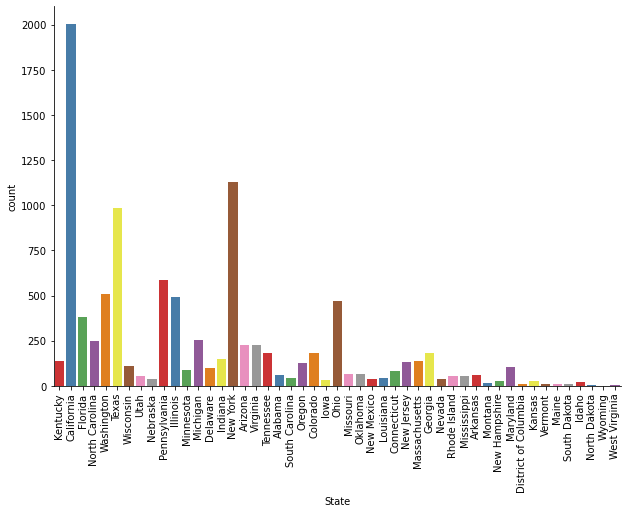

In [166]:
sns.catplot('State',kind='count',data=df,palette='Set1',height=6,aspect=1.5)
plt.xticks(rotation=90)

#### 5 Cities each of least and most quantities ordered

In [70]:
dftop10 = df.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
dftop10

,City,Quantity
386,Port Orange,1
259,Littleton,1
257,Lindenhurst,1
140,Elyria,1
213,Iowa City,1
...,...,...
452,Seattle,1590
438,San Francisco,1935
374,Philadelphia,1981
266,Los Angeles,2879


#### Top 10 most ordering cities

In [103]:
dftop10 = dftop10.head(10)
dftop10.reset_index(drop=True,inplace=True)
dftop10

,City,Quantity
0,Port Orange,1
1,Littleton,1
2,Lindenhurst,1
3,Elyria,1
4,Iowa City,1
5,Jupiter,1
6,Keller,2
7,Grand Island,2
8,Baytown,2
9,Holyoke,2


#### Quantities ordered region wise

    Region  Quantity
0  Central      8780
1     East     10618
2    South      6209
3     West     12266


Text(0.5, 1.0, 'Quantities ordered by each region')

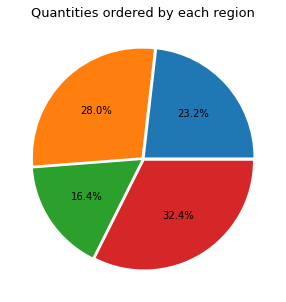

In [127]:
df_region=df.groupby('Region')['Quantity'].sum().reset_index()
print(df_region)

labels = df_region['Region'].unique()
plt.figure(figsize=(5,5))
plt.pie(df_region['Quantity'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02),)
plt.title('Quantities ordered by each region',size=13)

### Most selling categories 

In [107]:
df_cats = df.groupby('Category')['Quantity'].sum().reset_index()
df_cats

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


Text(0.5, 1.0, 'Distribution of products sold')

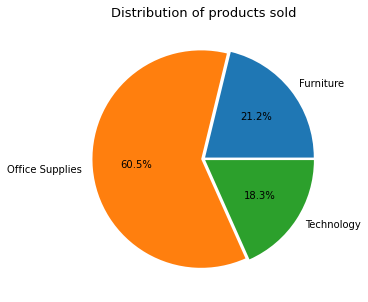

In [126]:
plt.figure(figsize=(5,5))
labels=df_cats['Category'].unique()
plt.pie(df_cats['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of products sold',size=13)

### Profitable categories

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


Text(0.5, 1.0, 'Distribution of profits categorywise')

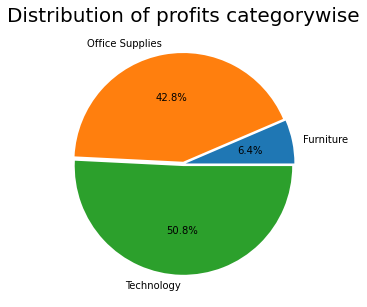

In [132]:
dfprofit = df.groupby('Category')['Profit'].sum().reset_index()
print(dfprofit)
plt.figure(figsize=(5,5))
labels=dfprofit['Category'].unique()
plt.pie(dfprofit['Profit'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of profits categorywise',size=20)

### Profitable Products

In [134]:
dftop10_items = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
dftop10_items.reset_index(drop=True,inplace=True)

dftop10_items=dftop10_items.head(10)
dftop10_items

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


Text(0.5, 6.799999999999997, 'Products')

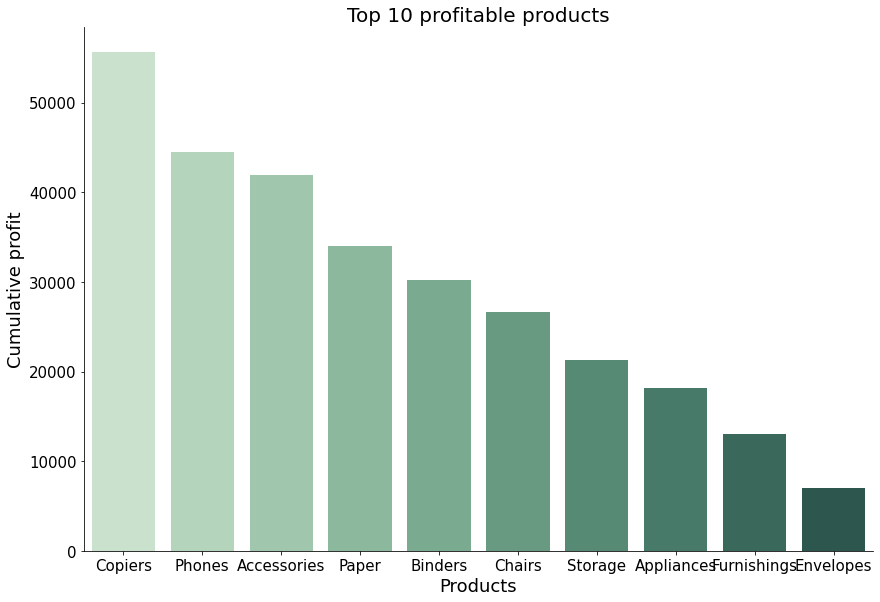

In [153]:
sns.catplot('Sub-Category','Profit',data=dftop10_items,kind='bar',aspect=1.5,height=8,palette='ch:2.5,-.2,dark=.3')
plt.title('Top 10 profitable products',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('Products',size=18)

## Top Profitable cities

In [142]:
dftop10_cities = df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

dftop10_cities = dftop10_cities.head(10)
dftop10_cities

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


Text(0.5, 6.799999999999997, 'City')

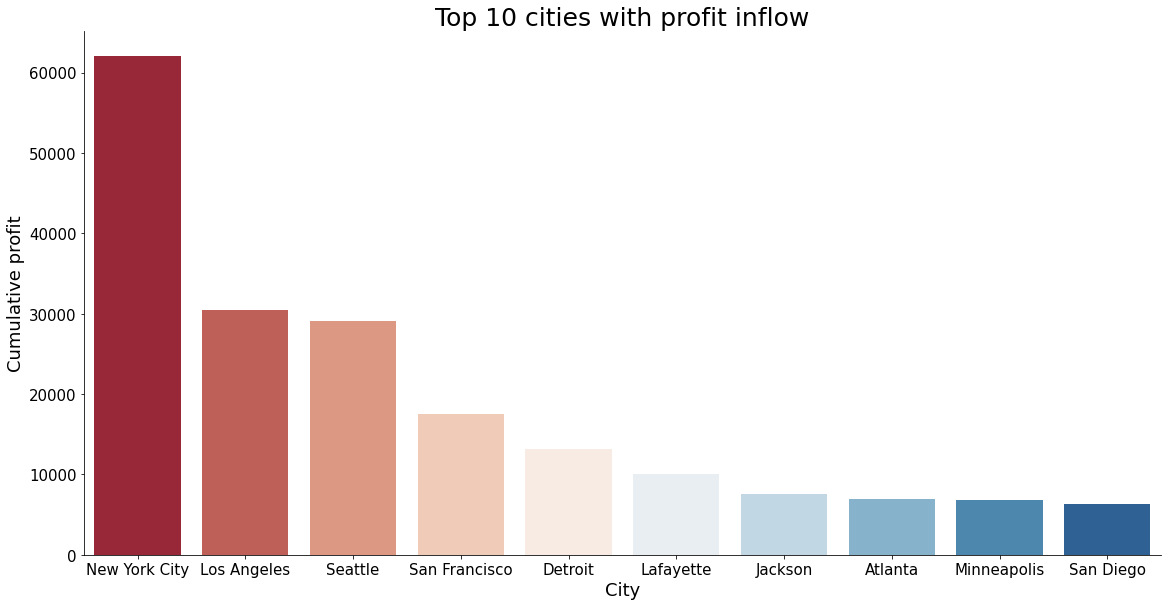

In [152]:
sns.catplot('City','Profit',data=dftop10_cities,kind='bar',aspect=2,height=8,palette='RdBu')
plt.title('Top 10 cities with profit inflow',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('City',size=18)

## Conclusion : 
##### NYC provides the highest profits followed by LA and Seattle. This is probably because a lot of large scale corporate offices are located in NY.